- **Dataset Context**: This dataset contains **credit card transactions** made in **September 2013** by **European cardholders**.
- **Timeframe**: The dataset covers transactions over a period of **two days**.
- **Fraudulent Transactions**: Out of **284,807 transactions**, there are **492 fraudulent transactions**, making the **positive class (fraud)** account for only **0.172%** of the total. This indicates a **highly imbalanced dataset**.

Here we aim trough data mining and pattern recognition, find wether a transaction is fraudlent or not

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load dataset into DataFrame
df = pd.read_csv("/content/creditcard.csv")

# View the first few rows
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print("Summary Statistics of the Data:")
df.describe()
df.shape

Summary Statistics of the Data:


(284807, 31)

## Insights

- **Shape of Data**: The dataset contains **284,807 rows** and **31 columns**, providing a substantial sample size for analysis.
- **Null Values**: There are **no missing values**, as all columns have 284,807 non-null entries.
- **Feature Types**: Most features are of type **float**, with **Class** as an integer (target variable).
- **Initial Summary**: Descriptive statistics suggest possible outliers, particularly in the **Amount** feature, due to a **high standard deviation**.




In [ ]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]

outliers_frc = len(fraud) / float(len(valid))
print(outliers_frc)

print('Fraud Cases: {}' .format(len(fraud)))
print('valid Cases: {}' .format(len(valid)))

0.0017304750013189597
Fraud Cases: 492
valid Cases: 284315


<ipython-input-36-2e1fdb3d4a92>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='pastel')


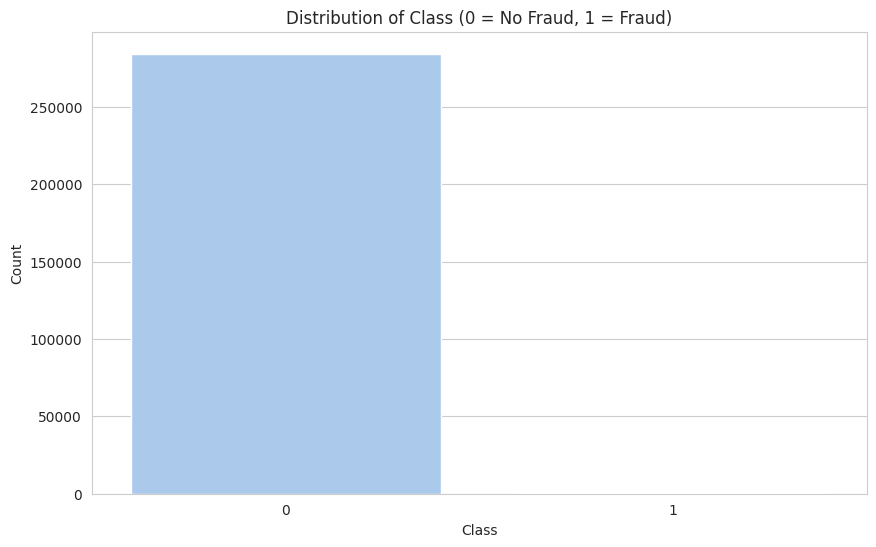

In [ ]:
# visualize class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df, palette='pastel')
plt.title('Distribution of Class (0 = No Fraud, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

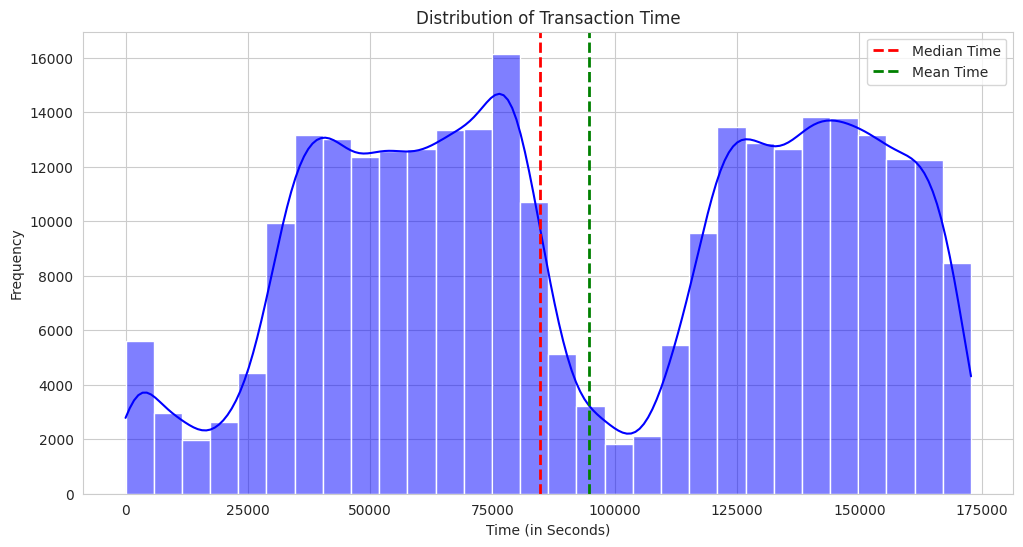

In [ ]:
sns.set_style('whitegrid')

# create a histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['Time'], bins=30, kde=True, color='blue')
plt.title('Distribution of Transaction Time')
plt.xlabel("Time (in Seconds)")
plt.ylabel("Frequency")
plt.axvline(x = df['Time'].median(), color='red', linestyle='dashed', linewidth=2, label='Median Time')
plt.axvline(x = df['Time'].mean(), color='green', linestyle='dashed', linewidth=2, label='Mean Time')
plt.legend()
plt.show()

### Analysis of Average Fraud Probability by Hour of the Day

The bar chart displays the average fraud probability for each hour of the day. Here’s a breakdown of the observed pattern:

1. **Peak Hours**:
   - The probability of fraud is highest between **1:00 AM and 4:00 AM**, with a significant spike at **2:00 AM**.
   - This suggests that fraudulent activity is more likely to occur during these early morning hours.

2. **Gradual Decline**:
   - After **4:00 AM**, the fraud probability gradually decreases as the day progresses.
   - There are relatively low fraud probabilities during standard business hours (**9:00 AM to 5:00 PM**).

3. **Low Probability in the Evening**:
   - From around **6:00 PM onward**, fraud probabilities remain low, with only a slight increase at around **11:00 PM**.

This pattern could indicate that fraudsters target specific hours when fewer people might be actively monitoring transactions, particularly during **late night to early morning hours**.


<ipython-input-38-63d386a0645f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hour_fraud, x='Hour', y='Class', palette='viridis')


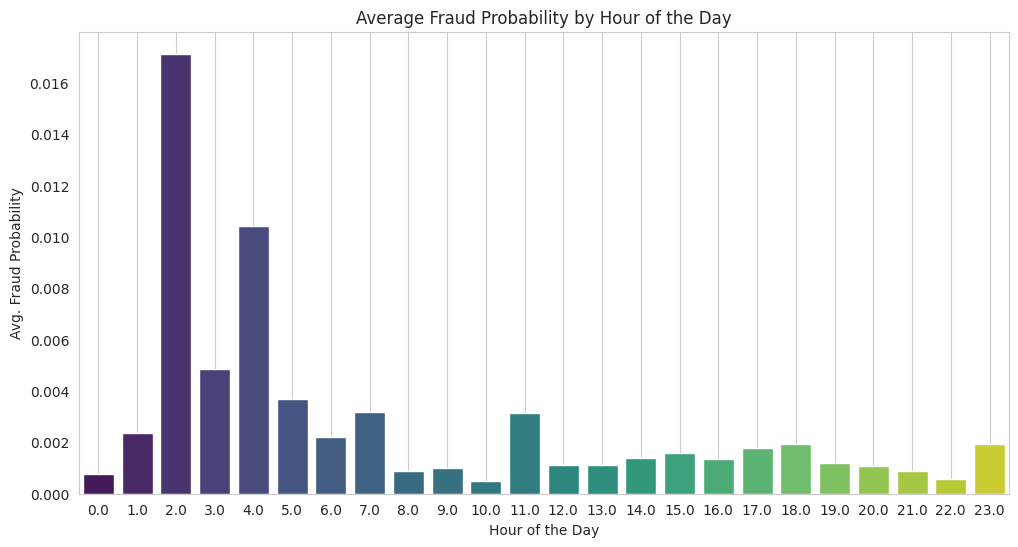

In [ ]:
# convert 'Time' from seconds to hours for better analysis
df['Hour'] = (df['Time'] //  3600) % 24

# caluclate the mean fruad probability by hour
hour_fraud = df.groupby('Hour')['Class'].mean().reset_index()

# plotting the average fruad probability by hour
plt.figure(figsize=(12, 6))
sns.barplot(data=hour_fraud, x='Hour', y='Class', palette='viridis')
plt.title('Average Fraud Probability by Hour of the Day')
plt.xlabel("Hour of the Day")
plt.ylabel("Avg. Fraud Probability")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

### Key Observations from Feature Distributions

1. **Class Imbalance**:
   - The `Class` feature is heavily imbalanced, with far more non-fraudulent transactions than fraudulent ones. Addressing this imbalance with techniques like oversampling or specialized metrics (e.g., F1-score) will likely be necessary.

2. **Feature Sparsity and Outliers**:
   - Certain features, such as `V2`, `V3`, `V10`, and `V20`, show narrow distributions with extreme values (outliers). These could be indicative of unusual behaviors that may correlate with fraud.

3. **Distinctive Peaks in `Time` and `Hour`**:
   - Both `Time` and `Hour` histograms show specific peaks, suggesting transactions are clustered at certain times, potentially aligning with peak business hours. These peaks may be important in isolating fraudulent patterns.

4. **Skewed Features**:
   - The `Amount` feature is right-skewed, with most transactions small but some high-value outliers. Some `V` features (e.g., `V5`, `V6`, `V8`) also show slight skews, possibly associated with fraudulent behavior.

These observations suggest that focusing on skewed and sparse features, along with addressing class imbalance, could improve fraud detection.


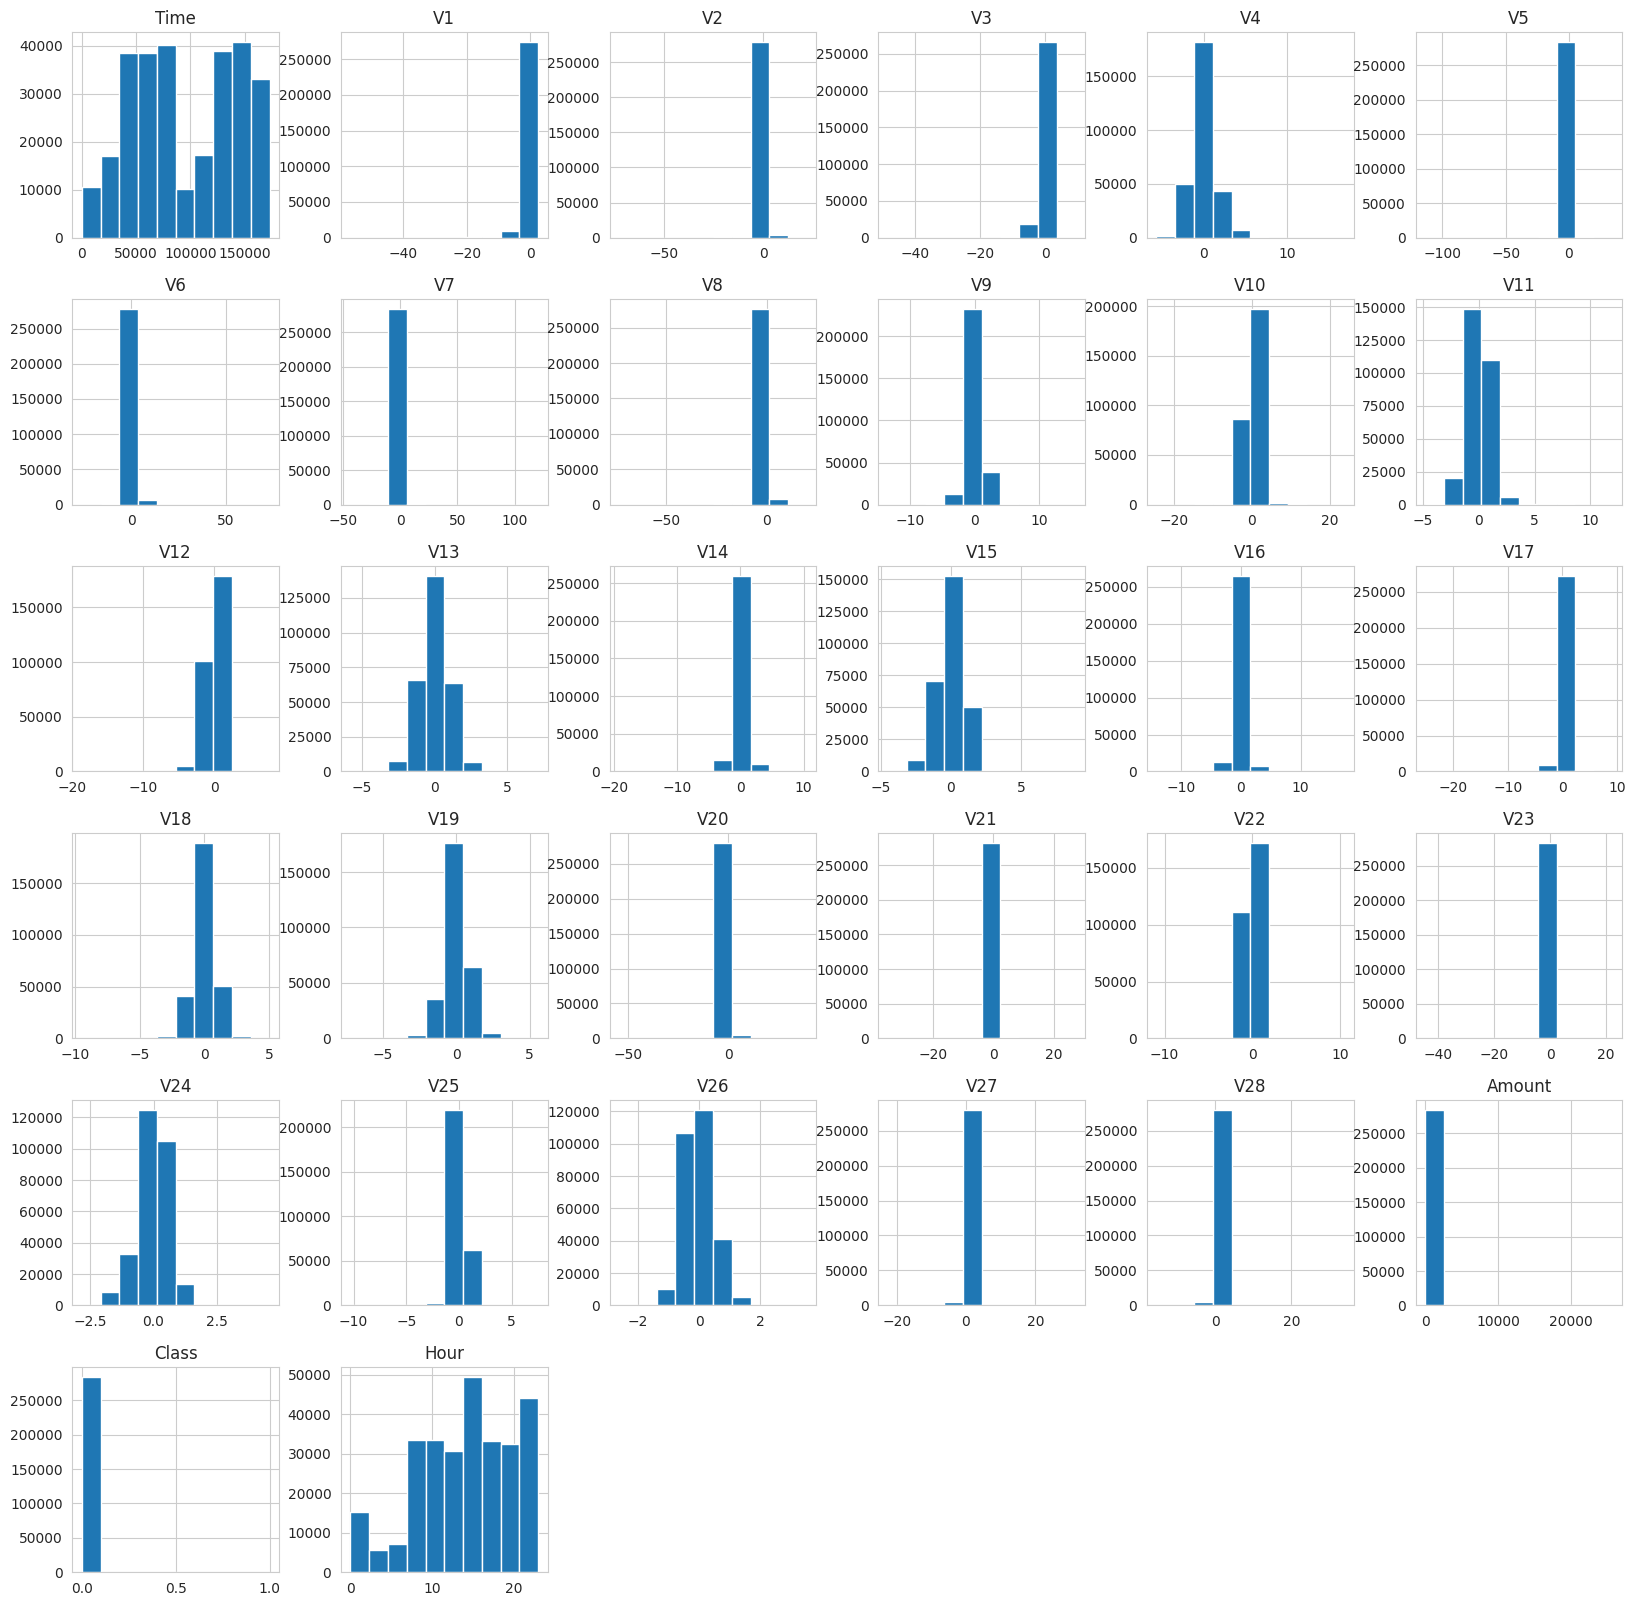

In [ ]:
#plot histogram
df.hist(figsize = (20 , 20))
plt.show()

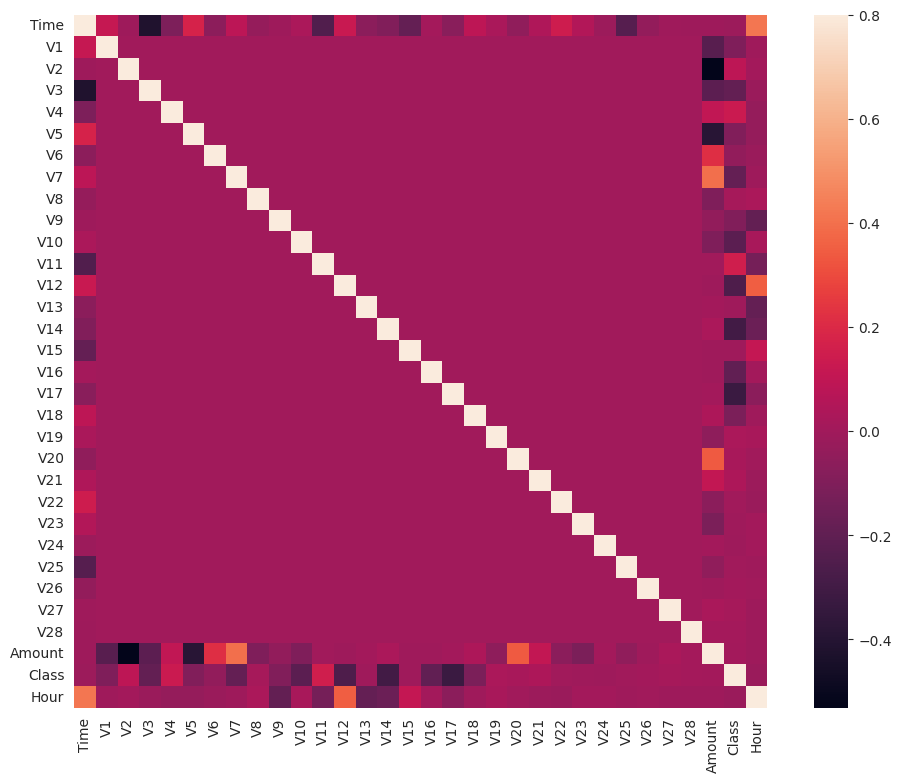

In [ ]:
# Correlation metrics
corrmat = df.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat , vmax= .8 ,square = True)
plt.show()

##Apply a pattern founding algorithm

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
# Get all the coluimns in dataframe
columns = df.columns.tolist()

# Filter the columns to remove data we do not want
columns = [data for data in columns if data not in ['Class']]
target = "Class"

X = df[columns]
y = df[target]

#Print the shape opf x and y

print(X.shape)
print(y.shape)

(284807, 31)
(284807,)


In [ ]:
# define a random state
state = 1

Classifier = {
    "Isolation forest ": IsolationForest(max_samples=len(X),
                                        contamination = outliers_frc,
                                        random_state = state),

    "Local Outliers Factor" : LocalOutlierFactor(
    n_neighbors = 20 ,
    contamination = outliers_frc,
    novelty=True )
}

## Why Isolation Forest and Local Outlier Factor (LOF) for Pattern Detection?

- **Isolation Forest**: This algorithm isolates observations by randomly selecting features and splitting values. Anomalies are more easily isolated than normal points, making Isolation Forest effective for detecting outliers in large datasets. In fraud detection, this approach helps identify transactions that significantly deviate from normal behavior patterns.

- **Local Outlier Factor (LOF)**: LOF measures the local deviation of a data point relative to its neighbors. It’s particularly effective in detecting anomalies in data with local clusters, making it ideal for identifying fraud patterns where certain transactions may appear abnormal only when compared with nearby points.

Using both techniques provides a comprehensive approach to pattern recognition by capturing both global and local anomalies in transaction data, which are key indicators of fraudulent behavior.


In [ ]:
n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(Classifier.items()):
    #fit the data and tag outliers
    if clf_name == "Local Outliers Factors":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_  # Use negative_outlier_factor_ instead of decision_function

    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)  # This will work for Isolation Forest
        y_pred = clf.predict(X)

    # reshape the prediction values to 0 for valid and 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    n_errors = (y_pred != y).sum()

    # Run Classification Metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(y, y_pred))
    print(classification_report(y, y_pred))

Isolation forest : 679
0.9976159293837581
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.31      0.31      0.31       492

    accuracy                           1.00    284807
   macro avg       0.65      0.65      0.65    284807
weighted avg       1.00      1.00      1.00    284807



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Local Outliers Factor: 849
0.9970190339422837
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.06      0.05      0.05       492

    accuracy                           1.00    284807
   macro avg       0.53      0.52      0.53    284807
weighted avg       1.00      1.00      1.00    284807

